In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load data
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [7]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
#reshape y into 2d array because feature scaling takes one standard format
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [9]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [11]:
print(x)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [12]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [13]:
#Training the svr model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)


/Users/robertkigobe/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [14]:
#predict a new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

Text(0, 0.5, 'Salary')

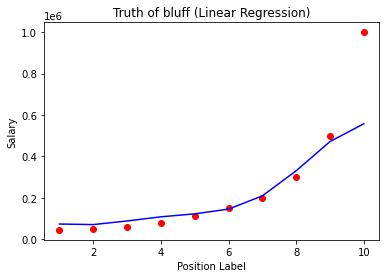

In [15]:
#visualizing the SVR results

plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color = 'blue')
plt.title("Truth of bluff (Support Vector Regression)")
plt.xlabel("Position Label")
plt.ylabel("Salary")